In [1]:
import os
import pandas as pd
from utils.utils import save_mpl_fig, change_width
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context="notebook", font_scale=1.05, 
              style='whitegrid', palette='dark') #  Darkgrid Whitegrid Dark White Ticksimport matplotlib.pyplot as plt
import matplotlib.ticker as ticker

DATAPATH = "../data/individual_browsing_data.csv"        
FIGSAVEDIR = "../figs"

df_ind = pd.read_csv(DATAPATH)
df_ind.head(3)

,caseid,birthyr,gender,race,educ,pid3,pid7,presvote20post,inputstate,region,...,duration_adult,duration_nonadult,duration,prop_adult_duration,yes_visit_adults,race2,cohort,age,age2,educ2
0,200661421,1963,2,1,4,3,3,1,39,2,...,0.0,77642.0,77642.0,0.00000,0.0,1,1960,60,3600,4
1,200686597,1992,2,6,5,5,8,-1,48,3,...,25952.0,234196.0,260148.0,9.97586,1.0,5,1990,31,961,4
2,200953869,1959,2,1,5,2,7,2,42,1,...,0.0,1182.0,1182.0,0.00000,0.0,1,1960,64,4096,4


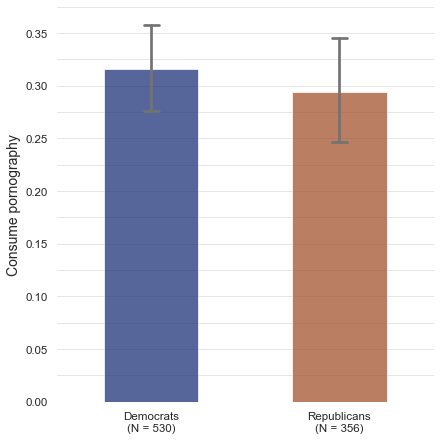

In [2]:
# (fold cell) plot
scale = .7
fig, ax = plt.subplots(figsize=(9*scale, 9*scale))

sns.barplot(
    data=df_ind.query("party!='I'"),
    y="yes_visit_adults", 
    x="party",
    capsize=.08, 
    errcolor=".45",
    alpha=.7,
    ax=ax,
)
change_width(ax, .5)
nRep = len(df_ind.query("party=='R'"))
nDem = len(df_ind.query("party=='D'"))
nInd = len(df_ind.query("party=='I'"))
ax.set_xticklabels([f"Democrats\n(N = {nDem})", f"Republicans\n(N = {nRep})"])
ax.set_ylabel("Consume pornography", size=14)
ax.set_xlabel("")
ax.get_yaxis().set_minor_locator(ticker.AutoMinorLocator(2))
ax.yaxis.grid(True, which="both", color=".9")
sns.despine(left=True, bottom=True)
plt.tight_layout()
save_mpl_fig(os.path.join(FIGSAVEDIR, "consume_porn_yes_no"))

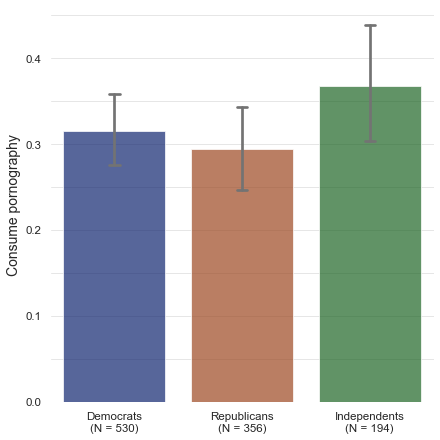

In [3]:
# (fold cell) plot
scale = .7
fig, ax = plt.subplots(figsize=(9*scale, 9*scale))

sns.barplot(
    data=df_ind,
    y="yes_visit_adults", 
    x="party",
    capsize=.08, 
    errcolor=".45",
    alpha=.7,
#     order=["D", "I", "R"],
    ax=ax,
)
ax.set_xticklabels([f"Democrats\n(N = {nDem})", f"Republicans\n(N = {nRep})", f"Independents\n(N = {nInd})"])
ax.set_ylabel("Consume pornography", size=14)
ax.set_xlabel("")
ax.get_yaxis().set_minor_locator(ticker.AutoMinorLocator(2))
ax.yaxis.grid(True, which="both", color=".9")
sns.despine(left=True, bottom=True)
plt.tight_layout()
# save_mpl_fig(os.path.join(FIGSAVEDIR, "consume_porn_yes_no"))